In [1]:
###: Loading H2O Library

In [2]:
import h2o

In [3]:
###: Get H2O Version

In [4]:
h2o.__version__

u'3.14.0.7'

In [5]:
###: Initalizing H2O cluster

In [6]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,2 days 3 hours 38 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,1 month and 2 days
H2O cluster name:,H2O_from_python_avkashchauhan_d7ekmq
H2O cluster total nodes:,1
H2O cluster free memory:,2.733 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [7]:
###: Importing both training and test dataset into H2O cluster memory

In [8]:
#train_df = h2o.import_file("/Users/avkashchauhan/examples/regression/house_price_train.csv")
#test_df = h2o.import_file("/Users/avkashchauhan/examples/regression/house_price_test.csv")

train_df = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/house_price_train.csv")
test_df = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/house_price_test.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
###: Understanding Training dataset

In [10]:
train_df.describe()

Rows:407
Cols:14




,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
type,real,real,real,int,real,real,real,real,int,int,real,real,real,real
mins,0.00906,0.0,0.46,0.0,0.385,3.863,2.9,1.1296,1.0,188.0,12.6,0.32,1.73,5.0
mean,3.56736771499,10.5872235872,11.4092628993,0.0687960687961,0.556763882064,6.28658230958,69.3889434889,3.71767051597,9.83783783784,412.378378378,18.4474201474,354.403218673,12.792039312,22.6248157248
maxs,73.5341,100.0,27.74,1.0,0.871,8.725,100.0,10.7103,24.0,711.0,22.0,396.9,37.97,50.0
sigma,7.94798961655,22.2597824603,6.8144822924,0.253418548596,0.115557348898,0.690897322921,27.8179045475,2.01524090631,8.78440418525,170.44740987,2.16176742548,94.175205015,7.09869539936,9.18501930903
zeros,0,301,0,379,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


In [11]:
###: Understanding Test dataset

In [12]:
test_df.describe()

Rows:99
Cols:14




,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
type,real,real,real,int,real,real,real,real,int,int,real,real,real,real
mins,0.00632,0.0,0.74,0.0,0.389,3.561,9.9,1.1781,1.0,187.0,12.6,6.68,2.88,5.6
mean,3.80327535354,14.5555555556,10.0165656566,0.0707070707071,0.54618989899,6.27662626263,65.2282828283,4.11312828283,8.36363636364,391.212121212,18.4888888889,366.00959596,12.0817171717,22.1545454545
maxs,88.9762,95.0,27.74,1.0,0.871,8.78,100.0,12.1265,24.0,711.0,22.0,396.9,34.41,50.0
sigma,10.9318629744,27.154498339,6.96902859181,0.257639411539,0.11739221152,0.752520981955,29.378799938,2.42831711324,8.3206830389,160.149373687,2.18869492793,78.0843033028,7.32150592857,9.28388193709
zeros,0,71,0,92,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02985,0.0,2.18,0.0,0.458,6.43,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
2,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.9,18.72,15.2


In [13]:
###: Training and test dataset - columns and rows details

In [14]:
print(train_df.shape)
print(test_df.shape)

(407, 14)
(99, 14)


In [15]:
###: Training and Test Dataframes - columns names

In [16]:
print(train_df.col_names)
print(test_df.col_names)

[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat', u'medv']
[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat', u'medv']


In [17]:
###: Settings response or target variable for supervised machine learning

In [18]:
response = "medv"
features = train_df.col_names
print(features)

[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat', u'medv']


In [19]:
###: Creating a list of all features we will use for machine learning

In [20]:
features.remove(response)
print(features)

[u'crim', u'zn', u'indus', u'chas', u'nox', u'rm', u'age', u'dis', u'rad', u'tax', u'ptratio', u'b', u'lstat']


In [21]:
###: Understanding response variable values as historgram in Training data

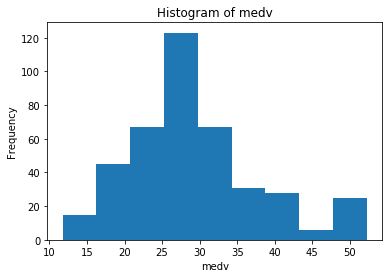

In [22]:
train_df['medv'].hist()

In [23]:
###: Importing H2O Estimator to build Random Forest Model

In [24]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [25]:
###:Building Random Forest (RF) -  Regression model with cross validation

In [26]:
drf_model_with_cv = H2ORandomForestEstimator(nfolds=5)
drf_model_with_cv.train(x = features, y = response, training_frame=train_df)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [27]:
drf_model_with_cv.model_performance(valid=True,test_data=test_df).r2()

0.8592999890363583

In [28]:
#:Building Random Forest -  Regression model with training and validation data now
#  Setting key GBM parameters

In [32]:
drf_model_cv_config = H2ORandomForestEstimator(
                                      ntrees=10,
                                      max_depth=3,
                                      min_rows=2,
                                      nfolds=5,
                                      keep_cross_validation_predictions=True,
                                      seed=1)

In [33]:
###: Training the DRF model

In [35]:
drf_model_cv_config.train(x = features, y = response, 
                                            training_frame=train_df, 
                                           model_id = "drf_model_with_training_and_validtion_python")

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [36]:
###: Getting model performance based on test data

In [37]:
drf_model_cv_config.model_performance(valid=True,test_data=test_df).r2()

0.7442147699530761

In [38]:
###: Importing H2O Grid Search Library

In [39]:
from h2o.grid import H2OGridSearch

In [40]:
###: Setting GBM specific Parameters

In [96]:
drf_hyper_params = {
                "ntrees" : [10,25,50],
                "max_depth": [ 5, 7, 10],
                "sample_rate": [0.5, 0.75, 1.0]}

In [97]:
###: Setting GBM hyperparameter search criteria

In [98]:
grid_search_criteria = {"strategy": "RandomDiscrete", 
                        "max_models": 100, 
                        "seed": 12345}

In [99]:
###: Finalizing the settings for GBM grid search

In [100]:
house_price_drf_grid = H2OGridSearch(model=H2ORandomForestEstimator(
                                                        seed=1,
                                                        nfolds=5,
                                                        fold_assignment="Modulo",
                                                        keep_cross_validation_predictions=True),
                     hyper_params=drf_hyper_params,
                     search_criteria=grid_search_criteria,
                     grid_id="house_price_drf_grid")

In [101]:
###: Finally traning the GBM grid Search Model

In [102]:
house_price_drf_grid.train(x=features, y=response, training_frame=train_df)

drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [103]:
###: Getting the tital number of models built into H2O GBM Grid

In [108]:
len(house_price_drf_grid)

27

In [109]:
###: Defining a function to find the best model from the grid based on r2 or auc

In [141]:
def find_best_model_from_grid(h2o_grid, test_parameter):    
    model_list = []
    for grid_item in h2o_grid:
        if test_parameter is "r2":
            if not (grid_item.r2() == "NaN"):
                model_list.append(grid_item.r2())
            else:
                model_list.append(0.0)            
        elif test_parameter is "auc":
            if not (grid_item.auc() == "NaN"):
                model_list.append(grid_item.auc())
            else:
                model_list.append(0.0)            
    #print(model_list)        
    max_index = model_list.index(max(model_list))
    #print(max_index)
    best_model = h2o_grid[max_index]
    print("Model ID with best R2: " +  best_model.model_id)
    if test_parameter is "r2":
        print("Best R2: " +  str(best_model.r2()))
    elif test_parameter is "auc":
        print("Best AUC: " +  str(best_model.auc()))
    return best_model

In [142]:
###: Applying the function to get the best model from the grid

In [140]:
best_drf_model = find_best_model_from_grid(house_price_drf_grid, "r2")

[0.0, 0.0, 0.0, 0.0, 0.8802574695553543, 0.8762712340556501, 0.0, 0.8697356046404314, 0.0, 0.7600572223041284, 0.8637521515058844, 0.754685679436707, 0.0, 0.0, 0.8612283417764732, 0.8766456005407139, 0.0, 0.8725641254101766, 0.872201157181079, 0.8424710111932898, 0.7554097981045245, 0.8601392969596601, 0.8684530317620577, 0.8519327605857256, 0.8502528122903086, 0.8532964347432449, 0.8310186450721682]
4
Model ID with best R2: house_price_drf_grid_model_5
Best R2: 0.880257469555


In [143]:
###: Getting the best model ID

In [144]:
best_drf_model.model_id

u'house_price_drf_grid_model_5'

In [145]:
#: Performing predictions with one of the above model

In [146]:
drf_predictions = best_drf_model.predict(test_data=test_df)

drf prediction progress: |████████████████████████████████████████████████| 100%


In [147]:
#: Understanding/Validating predictions based on prediction results historgram

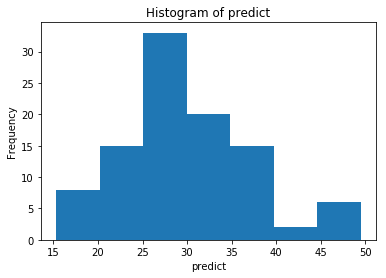

In [148]:
drf_predictions.hist()

In [149]:
#: Getting Scorring History

In [150]:
best_drf_model.score_history()

,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2017-11-22 23:04:22,3.050 sec,0.0,NaN,NaN,NaN
1,,2017-11-22 23:04:22,3.053 sec,1.0,6.112398,3.829956,37.361412
2,,2017-11-22 23:04:22,3.056 sec,2.0,5.130557,3.253997,26.322617
3,,2017-11-22 23:04:22,3.058 sec,3.0,4.981025,3.129697,24.810612
4,,2017-11-22 23:04:22,3.061 sec,4.0,5.209064,3.132939,27.134349
5,,2017-11-22 23:04:22,3.063 sec,5.0,4.985408,3.038066,24.854290
6,,2017-11-22 23:04:22,3.066 sec,6.0,5.086538,3.150961,25.872873
7,,2017-11-22 23:04:22,3.069 sec,7.0,4.947115,3.104096,24.473943
8,,2017-11-22 23:04:22,3.071 sec,8.0,4.601810,3.066275,21.176658
9,,2017-11-22 23:04:22,3.073 sec,9.0,4.518787,3.034084,20.419439


In [151]:
#: Getting DRF model variable importance 

In [152]:
best_drf_model.varimp()

[(u'lstat', 516211.6875, 1.0, 0.36297148917684763),
 (u'rm', 351581.875, 0.6810808114452077, 0.2472129163800428),
 (u'indus', 108481.90625, 0.2101500389798904, 0.07627847259910339),
 (u'ptratio', 101566.109375, 0.1967528280246464, 0.07141566698786209),
 (u'nox', 100654.671875, 0.19498720062396882, 0.07077479458090671),
 (u'dis', 77902.625, 0.15091216817906705, 0.05477681441886284),
 (u'tax', 51638.5625, 0.10003369499455589, 0.03630937924003652),
 (u'crim', 40370.9296875, 0.07820615198198123, 0.0283866034476906),
 (u'age', 33435.48046875, 0.06477087070747502, 0.023509979395973265),
 (u'b', 22409.646484375, 0.04341173791105805, 0.015757223157331753),
 (u'rad', 6670.453125, 0.01292193355269586, 0.004690293464666289),
 (u'zn', 6272.51318359375, 0.012151048369267599, 0.004410484121652966),
 (u'chas', 4986.00537109375, 0.009658838596314714, 0.003505883029023164)]

In [153]:
#: Getting DRF model variable importance PLOT

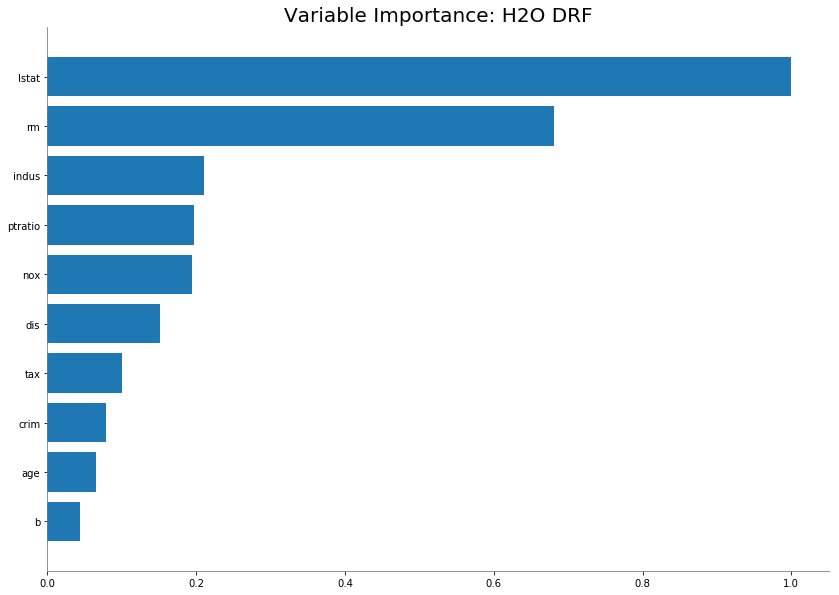

In [154]:
best_drf_model.varimp_plot()

In [ ]:
###: Plotting the model based on rmse

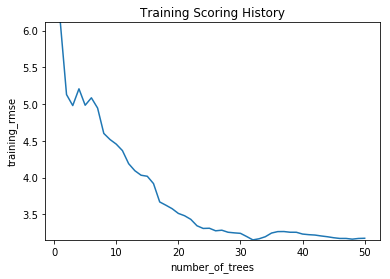

In [155]:
best_drf_model.plot(metric="rmse")